202044035 B반 조현상

In [1]:
!pip install matplotlib pandas
!pip install requests pandas


응답 데이터 (20231101): {'response': {'header': {'resultCode': '00', 'resultMsg': 'NORMAL_CODE'}, 'body': {'totalCount': 353, 'items': [{'statDate': '20231101', 'rideLctName': '주안역환승정류장', 'dropLctName': '인하대후문', 'totalPsgCnt': '2140', 'hour00': '0', 'hour01': '0', 'hour02': '0', 'hour03': '0', 'hour04': '0', 'hour05': '6', 'hour06': '11', 'hour07': '73', 'hour08': '238', 'hour09': '284', 'hour10': '280', 'hour11': '268', 'hour12': '233', 'hour13': '149', 'hour14': '137', 'hour15': '64', 'hour16': '69', 'hour17': '85', 'hour18': '65', 'hour19': '49', 'hour20': '32', 'hour21': '28', 'hour22': '39', 'hour23': '30'}, {'statDate': '20231101', 'rideLctName': '인하대후문', 'dropLctName': '주안역환승정류장', 'totalPsgCnt': '2132', 'hour00': '0', 'hour01': '0', 'hour02': '0', 'hour03': '0', 'hour04': '0', 'hour05': '4', 'hour06': '13', 'hour07': '18', 'hour08': '16', 'hour09': '12', 'hour10': '44', 'hour11': '80', 'hour12': '104', 'hour13': '118', 'hour14': '195', 'hour15': '230', 'hour16': '213', 'hour17': '237

<ipython-input-4-825ed70adf1d>:111: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from current font.
  plt.tight_layout()
<ipython-input-4-825ed70adf1d>:111: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from current font.
  plt.tight_layout()
<ipython-input-4-825ed70adf1d>:111: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  plt.tight_layout()
<ipython-input-4-825ed70adf1d>:111: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  plt.tight_layout()
<ipython-input-4-825ed70adf1d>:111: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  plt.tight_layout()
<ipython-input-4-825ed70adf1d>:111: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  plt.tight_layout()
<ipython-input-4-825ed70adf1d>:111: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  plt.tight_layout()
<ipython-input-4-825ed70adf1d>:111: UserWarning: Gl

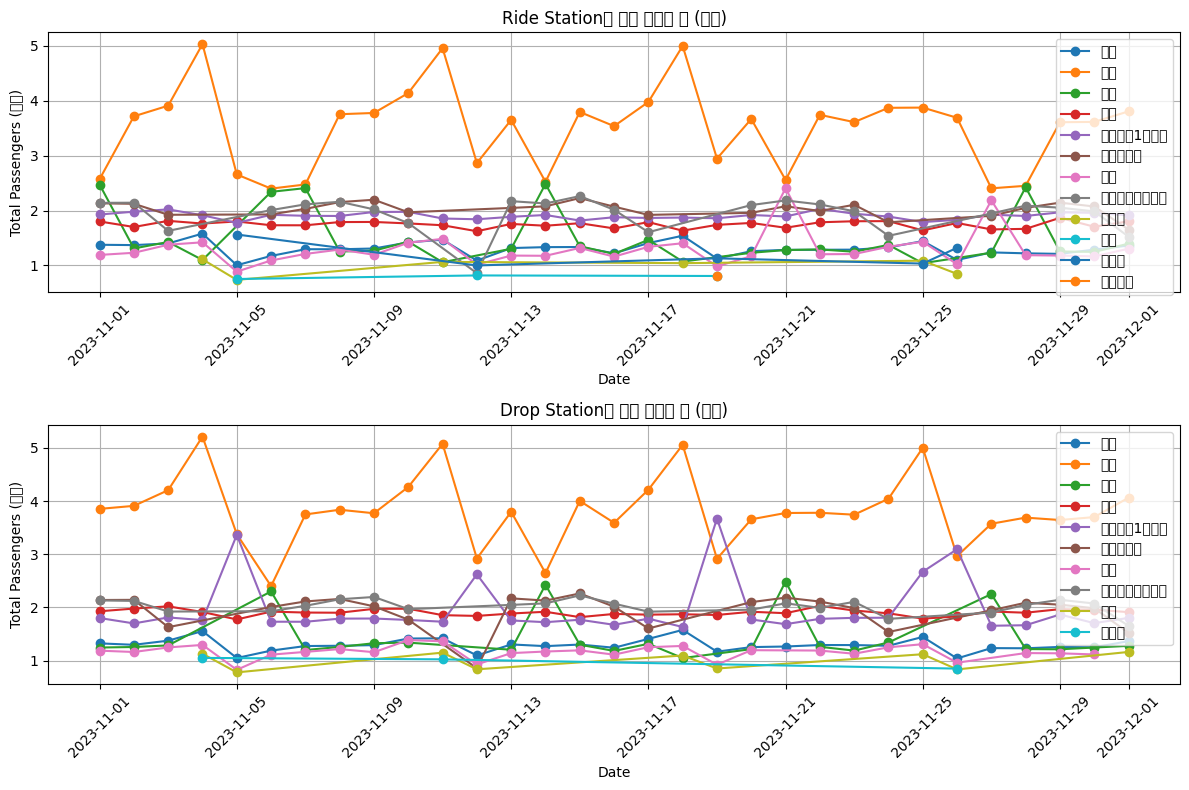

그래프 파일 저장 완료: /content/ride_drop_station_graph.png


In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# API 키
service_key = "29ct1DV0c9I1hcULhJec49fCZrffpG/opZkb7Y27AzZ8ZyxpCteIaAkxG8Pknymrle3++elVcjF5Jur3UBQK0g=="
url = "http://apis.data.go.kr/6280000/ICPubTrans_v2/STAT-BusStop_Station_Passenger_DD"  # 엔드포인트

# 기간 설정: 2023년 11월 1일부터 2023년 12월 1일까지
start_date = datetime(2023, 11, 1)
end_date = datetime(2023, 12, 1)
# CSV 파일을 저장할 리스트
csv_data = []

# 날짜 범위 생성
date_range = pd.date_range(start_date, end_date)

# 각 날짜에 대해 API 호출
for date in date_range:
    YMD = date.strftime('%Y%m%d')  # 날짜 형식을 YYYYMMDD로 변환
    params = {
        "serviceKey": service_key,
        "pageNo": "1",
        "numOfRows": "10",
        "YMD": YMD,
    }

    # API에 GET 요청 보내기
    response = requests.get(url, params=params)

    # 응답 상태 코드 확인
    if response.status_code == 200:
        data = response.json()  # 응답을 JSON 형식으로 변환
        print(f"응답 데이터 ({YMD}):", data)  # 응답 데이터 출력 (디버깅용)

        # 응답에서 필요한 데이터 추출
        if 'response' in data and 'body' in data['response'] and 'items' in data['response']['body']:
            items = data['response']['body']['items']
            if not items:
                print(f"{YMD}에는 항목이 없습니다.")

            for item in items:
                # CSV 파일에 저장할 데이터 추가
                csv_data.append([
                    item['statDate'],
                    item['rideLctName'],
                    item['dropLctName'],
                    item['totalPsgCnt']
                ])
        else:
            print(f"{YMD}의 응답 형식이 잘못되었습니다.")
            print(data)  # 응답 구조 출력 (디버깅용)
    else:
        print(f"에러 발생: {response.status_code} - {YMD}")
        print(response.text)  # 에러 내용 출력 (디버깅용)

# CSV 파일로 저장
if csv_data:
    csv_file_path = "/content/bus_stop_station_stats.csv"
    df = pd.DataFrame(csv_data, columns=['Date', 'Ride Station', 'Drop Station', 'Total Passengers'])
    # UTF-8-sig로 저장
    df.to_csv(csv_file_path, index=False, encoding='utf-8-sig')

    # CSV 파일 경로 출력
    print(f"CSV 파일 저장 완료: {csv_file_path}")

    # 그래프 추가: ride station과 drop station별 일간 이용자 수 (단위: 천명)
    df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')  # 날짜 형식 변환

    # 'Total Passengers' 컬럼을 숫자로 변환
    df['Total Passengers'] = pd.to_numeric(df['Total Passengers'], errors='coerce')

    # 승객 수를 천명 단위로 변환
    df['Total Passengers'] = df['Total Passengers'] / 1000  # 승객 수를 천명 단위로 변환

    # Ride Station별 이용자 수 합계
    df_ride_station = df.groupby(['Date', 'Ride Station'])['Total Passengers'].sum().reset_index()

    # Drop Station별 이용자 수 합계
    df_drop_station = df.groupby(['Date', 'Drop Station'])['Total Passengers'].sum().reset_index()

    # 그래프 그리기
    plt.figure(figsize=(12, 8))

    # Ride Station 그래프
    plt.subplot(2, 1, 1)  # 2행 1열의 첫 번째 그래프
    for station in df_ride_station['Ride Station'].unique():
        station_data = df_ride_station[df_ride_station['Ride Station'] == station]
        plt.plot(station_data['Date'], station_data['Total Passengers'], label=station, marker='o')
    plt.title('Ride Station별 일간 이용자 수 (천명)')
    plt.xlabel('Date')
    plt.ylabel('Total Passengers (천명)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()

    # Drop Station 그래프
    plt.subplot(2, 1, 2)  # 2행 1열의 두 번째 그래프
    for station in df_drop_station['Drop Station'].unique():
        station_data = df_drop_station[df_drop_station['Drop Station'] == station]
        plt.plot(station_data['Date'], station_data['Total Passengers'], label=station, marker='o')
    plt.title('Drop Station별 일간 이용자 수 (천명)')
    plt.xlabel('Date')
    plt.ylabel('Total Passengers (천명)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()

    # 그래프 파일로 저장
    plt.tight_layout()
    graph_file_path = "/content/ride_drop_station_graph.png"
    plt.savefig(graph_file_path)
    plt.show()  # 그래프 표시

    print(f"그래프 파일 저장 완료: {graph_file_path}")
else:
    print("저장할 데이터가 없습니다.")